<a href="https://colab.research.google.com/github/PradeepKumarLaghavarapu-DS/PRADEEPKUMAR_INFO5731_-Fall2022/blob/main/In_class_exercise_05_11172022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 11/17/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import KFold

#loading text data 
testing_data = pd.read_csv(r'stsa-test.txt', sep='\t', header=None)
training_data = pd.read_csv(r'stsa-test.txt', sep='\t', header=None)


def data_report(data):
    print(data.head())
    print(data.info())
    print(data.describe())
    print(data.shape)
    print(data.dtypes)
    print(data.isnull().sum())
    print(data.isnull().sum().sum())

data_report(training_data)
data_report(testing_data)

#cleaning the data
def data_clean(data):
    data.columns = ['label', 'text']
    data['text'] = data['text'].apply(lambda x: x.lower())
    data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]', '', x)))
    data['text'] = data['text'].apply((lambda x: re.sub('\s+', ' ', x)))
    return data

#ploting the data
def data_plot(data):
    sns.countplot(x='label', data=data)
    plt.show()


def split_data(data):
    train, validate = train_test_split(data, test_size=0.2, random_state=0)
    return train, validate

def data_algorithms(train, validate):
    #MultinominalNB
    mnb_model = MultinomialNB()
    mnb_model.fit(train['text'], train['label'])
    mnb_model_pred = mnb_model.predict(validate['text'])
    mnb_model_accuracy = accuracy_score(validate['label'], mnb_model_pred)
    mnb_model_recall = recall_score(validate['label'], mnb_model_pred)
    mnb_model_precision = precision_score(validate['label'], mnb_model_pred)
    mnb_model_f1 = f1_score(validate['label'], mnb_model_pred)
    print('MultinominalNB')
    print('Accuracy:', mnb_model_accuracy)
    print('Recall:', mnb_model_recall)
    print('Precision:', mnb_model_precision)
    print('F1 score:', mnb_model_f1)
    print('\n')
    
    #SVM
    svc_model = SVC()
    svc_model.fit(train['text'], train['label'])
    svc_model_pred = svc_model.predict(validate['text'])
    svc_model_accuracy = accuracy_score(validate['label'], svc_model_pred)
    svc_model_recall = recall_score(validate['label'], svc_model_pred)
    svc_model_precision = precision_score(validate['label'], svc_model_pred)
    svc_model_f1 = f1_score(validate['label'], svc_model_pred)
    print('SVM')
    print('Accuracy:', svc_model_accuracy)
    print('Recall:', svc_model_recall)
    print('Precision:', svc_model_precision)
    print('F1 score:', svc_model_f1)
    print('\n')
    
    #KNN
    knn_model = KNeighborsClassifier()
    knn_model.fit(train['text'], train['label'])
    knn_model_pred = knn_model.predict(validate['text'])
    knn_model_accuracy = accuracy_score(validate['label'], knn_model_pred)
    knn_model_recall = recall_score(validate['label'], knn_model_pred)
    knn_model_precision = precision_score(validate['label'], knn_model_pred)
    knn_model_f1 = f1_score(validate['label'], knn_model_pred)
    print('KNN')
    print('Accuracy:', knn_model_accuracy)
    print('Recall:', knn_model_recall)
    print('Precision:', knn_model_precision)
    print('F1 score:', knn_model_f1)
    print('\n')

    #Decision tree
    dt_model = DecisionTreeClassifier()
    dt_model.fit(train['text'], train['label'])
    dt_model_pred = dt_model.predict(validate['text'])
    dt_model_accuracy = accuracy_score(validate['label'], dt_model_pred)
    dt_model_recall = recall_score(validate['label'], dt_model_pred)
    dt_model_precision = precision_score(validate['label'], dt_model_pred)
    dt_model_f1 = f1_score(validate['label'], dt_model_pred)
    print('Decision tree')
    print('Accuracy:', dt_model_accuracy)
    print('Recall:', dt_model_recall)
    print('Precision:', dt_model_precision)
    print('F1 score:', dt_model_f1)
    print('\n')

    #Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(train['text'], train['label'])
    rf_model_pred = rf_model.predict(validate['text'])
    rf_model_accuracy = accuracy_score(validate['label'], rf_model_pred)
    rf_model_recall = recall_score(validate['label'], rf_model_pred)
    rf_model_precision = precision_score(validate['label'], rf_model_pred)
    rf_model_f1 = f1_score(validate['label'], rf_model_pred)
    print('Random Forest')
    print('Accuracy:', rf_model_accuracy)
    print('Recall:', rf_model_recall)
    print('Precision:', rf_model_precision)
    print('F1 score:', rf_model_f1)
    print('\n')
    
    #XGBoost
    xgb_model = XGBClassifier()
    xgb_model.fit(train['text'], train['label'])
    xgb_model_pred = xgb_model.predict(validate['text'])
    xgb_model_accuracy = accuracy_score(validate['label'], xgb_model_pred)
    xgb_model_recall = recall_score(validate['label'], xgb_model_pred)
    xgb_model_precision = precision_score(validate['label'], xgb_model_pred)
    xgb_model_f1 = f1_score(validate['label'], xgb_model_pred)
    print('XGBoost')
    print('Accuracy:', xgb_model_accuracy)
    print('Recall:', xgb_model_recall)
    print('Precision:', xgb_model_precision)
    print('F1 score:', xgb_model_f1)
    print('\n')

    
def data_run():
    result = data_algorithms(data_split(training_data)[0], data_split(testing_data)[0])
    return result

                                                   0
0   0 no movement , no yuks , not much of anything .
1  0 a gob of drivel so sickly sweet , even the e...
2  0 gangs of new york is an unapologetic mess , ...
3  0 we never really feel involved with the story...
4          1 this is one of polanski 's best films .
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1821 non-null   object
dtypes: object(1)
memory usage: 14.4+ KB
None
                                                       0
count                                               1821
unique                                              1821
top     0 no movement , no yuks , not much of anything .
freq                                                   1
(1821, 1)
0    object
dtype: object
0    0
dtype: int64
0
                                                   0
0   0 no movement , no yuk

(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

               Price         Rating   Review Votes
count  407907.000000  413840.000000  401544.000000
mean      226.867155       3.819578       1.507237
std       273.006259       1.548216       9.163853
min         1.730000       1.000000       0.000000
25%        79.990000       3.000000       0.000000
50%       144.710000       5.000000       0.000000
75%       269.990000       5.000000       1.000000
max      2598.000000       5.000000     645.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413778 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB
None


       

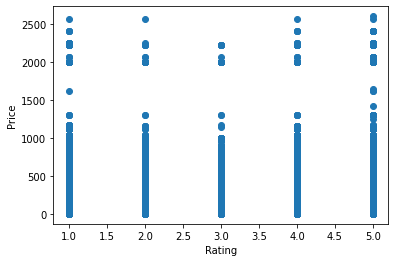

In [11]:
#Write your code here.


#loading machine learning libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Loading the data
amazon_data = pd.read_csv(r'Amazon_Unlocked_Mobile.csv')

def data_split(amazon_data):
    #spliting the data to train and test
    train, validate = train_test_split(amazon_data, test_size=0.2, random_state=42)
    return train, validate

def analysis_descriptive(amazon_data):
    #descriptive analysis of the amazon data
    print(amazon_data.describe())
    print('\n')
    print(amazon_data.info())
    print('\n')
    print(amazon_data.head())
    print('\n')
    print(amazon_data.columns)
    print('\n')
    print(amazon_data.shape)
    print('\n')
    print(amazon_data.dtypes)
    print('\n')
    print(amazon_data.isnull().sum())
    print('\n')
    print(amazon_data.isnull().sum().sum())
    print('\n')

analysis_descriptive(amazon_data)
plt.scatter(amazon_data['Rating'], amazon_data['Price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

def plotting_data(amazon_data):
    #plotting data of the amazon 
    sns.set(style="whitegrid")
    sns.set(font_scale=1.5)
    sns.countplot(x="label", data=amazon_data)
    plt.show()

    sns.set(style="whitegrid")


def methods_clustering(train, validate):
    #clustering methods of the data

    from sklearn.cluster import KMeans
    from sklearn.cluster import DBSCAN

    #Hierarchical clustering of the data
    from scipy.cluster.hierarchy import linkage, dendrogram
    from scipy.cluster.hierarchy import fcluster

    #K means
    kmeans_model = KMeans(n_clusters=3, random_state=0).fit(train['Price'])
    kmeans_model_pred = kmeans_model.predict(validate['Price'])
    kmeans_model_accuracy = accuracy_score(validate['label'], kmeans_model_pred)
    kmeans_model_recall = recall_score(validate['label'], kmeans_model_pred)
    kmeans_model_precision = precision_score(validate['label'], kmeans_model_pred)
    kmeans_model_f1 = f1_score(validate['label'], kmeans_model_pred)
    print('K means')
    print('Accuracy:', kmeans_model_accuracy)
    print('Recall:', kmeans_model_recall)
    print('Precision:', kmeans_model_precision)
    print('F1 score:', kmeans_model_f1)
    print('\n')

    #DBSCAN
    dbscan_model = DBSCAN(eps=0.5, min_samples=5).fit(train['Price'])
    dbscan_model_pred = dbscan_model.predict(validate['Price'])
    dbscan_model_accuracy = accuracy_score(validate['label'], dbscan_model_pred)
    dbscan_model_recall = recall_score(validate['label'], dbscan_model_pred)
    dbscan_model_precision = precision_score(validate['label'], dbscan_model_pred)
    dbscan_model_f1 = f1_score(validate['label'], dbscan_model_pred)
    print('DBSCAN')
    print('Accuracy:', dbscan_model_accuracy)
    print('Recall:', dbscan_model_recall)
    print('Precision:', dbscan_model_precision)
    print('F1 score:', dbscan_model_f1)
    print('\n')

    #Hierarchical clustering of the data
    Z = linkage(train['Price'], 'ward')
    plt.figure(figsize=(25, 10))
    dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=train['label'])
    plt.show()

def data_run():
    result = methods_clustering(data_split(training_data)[0], data_split(testing_data)[0])
    return result


In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [12]:
#You can write you answer here. (No code needed)


# Finding clusters in data is done using a sort of unsupervised learning method called K means. 
# Similarly to other unsupervised learning algorithms, DBSCAN seeks out clusters that are not necessarily connected. 
# A supervised learning approach called hierarchical clustering is used to build a hierarchical tree of groups. 
# Clusters are the groupings at the bottom of the tree, and superclusters are the groups above them. 
# Members of each category in the hierarchy are similar to one another. A similarity matrix—a group of values that gauges how 
# similar two objects are to one another—determines this similarity.To identify groups that are similar to one another,
# hierarchical clustering is frequently utilized. In order to better comprehend the structure of the data, it is also utilized to
# establish a hierarchy of groupings. Hierarchical clustering, DBSCAN, and K means are examples of unsupervised learning methods.
# To detect clusters in the data, they all employ data.